<a href="https://colab.research.google.com/github/Lydia061003/Wu/blob/main/%E5%8F%B0%E6%8C%87%E6%9C%9F%E4%B9%8B%E9%9B%BB%E5%AD%90%E9%A1%9E%E8%82%A1%E5%83%B9%E6%8C%87%E6%95%B8%E5%9B%A0%E5%AD%90_meeting_20230913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# meeting_20230913
* 作者：中央經濟碩二吳俞潔 20230906
* 策略：運用台指期(下圖藍線)與電子期(下圖橘線)的連動性，進行配對交易。此次交易指標以電子類股價指數替代電子期，進行做多無加碼交易

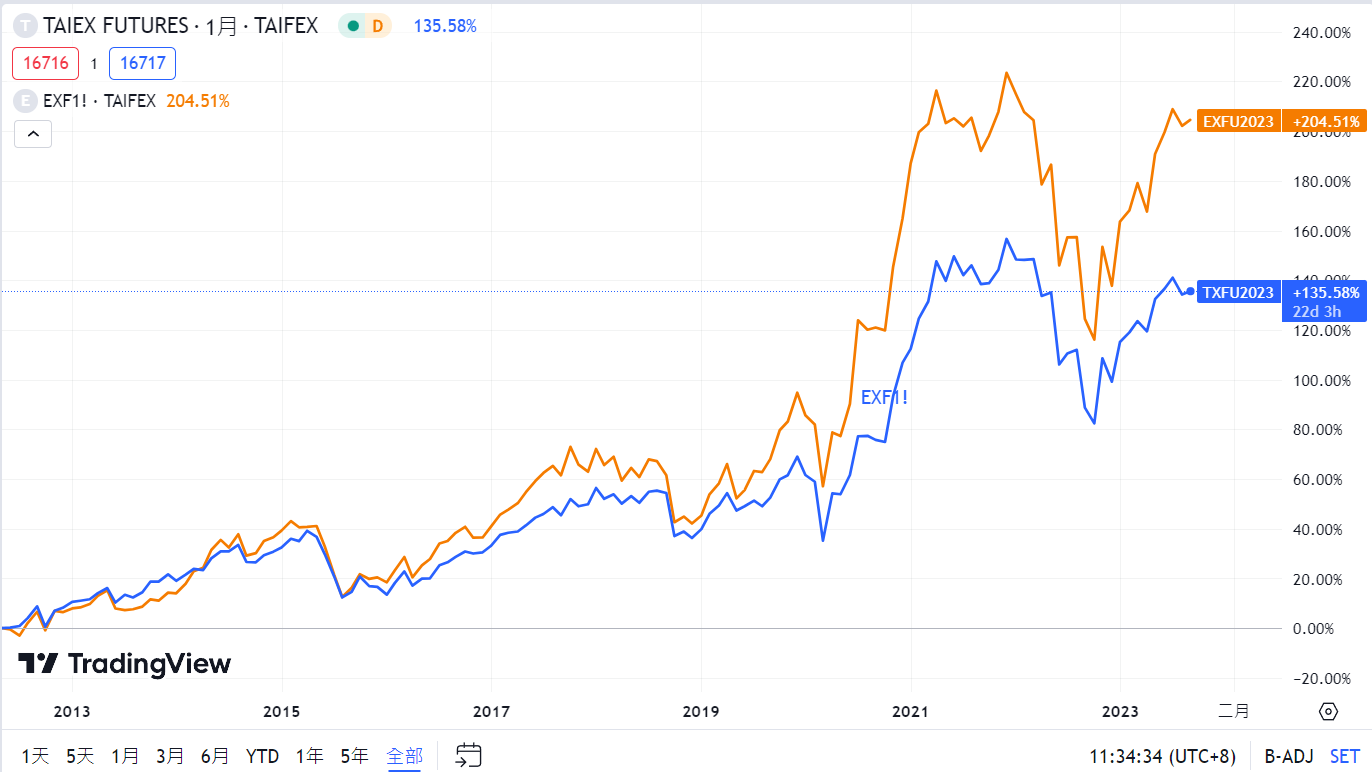

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time

plt.style.use('ggplot')
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf
plt.style.use('seaborn')

<ipython-input-102-93769e679063>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
!pip install --upgrade pandas_datareader

###資料整理
1.  讀txt檔案，
2.  再將時間軸轉換成index->將資料轉換成時間序列

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/CTA data')
os.listdir()
#df = pd.read_csv('TWE_Futures_Day_Trade.txt', sep=";", parse_dates=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['TWF_Futures_Minute_Trade.txt',
 'BTC_insmaple_data.csv',
 'settlementDate.csv',
 '台指期 CTA 回測框架(學員版).ipynb',
 '台指期_CTA_回測框架教材版.ipynb',
 '「台指期 CTA 回測框架(學員版).ipynb」20230730',
 'TWE_Futures_Day_Trade.txt',
 'FTSE.txt',
 'TMBA_Python基礎_202307.ipynb',
 '台指期之電子類股價指數因子_程交部申請']

In [ ]:
df = pd.read_csv('TWF_Futures_Minute_Trade.txt')
#df

In [ ]:
cf = pd.read_csv('FTSE.txt')
cf

,Date,Open,High,Low,Close,TotalVolume
0,2010/6/1,6185.42,6253.60,6253.60,6161.70,NaN
1,2010/6/2,6103.59,6185.42,6196.91,6069.12,NaN
2,2010/6/3,6248.21,6103.59,6254.43,6103.59,NaN
3,2010/6/4,6228.20,6248.21,6254.12,6217.11,NaN
4,2010/6/7,6060.88,6228.20,6228.20,5992.53,NaN
5,2010/6/8,6053.95,6060.88,6096.03,6038.48,NaN
6,2010/6/9,5990.84,6053.95,6074.45,5971.53,NaN
7,2010/6/10,6066.70,5990.84,6072.97,5989.79,NaN
8,2010/6/11,6163.29,6066.70,6194.53,6066.70,NaN
9,2010/6/14,6208.47,6163.29,6227.07,6163.29,NaN


In [ ]:
df.index = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date','Time'])
df.columns = ['open', 'high', 'low', 'close', 'volume']
df['Hour'] = df.index.map(lambda x: x.hour)
df.head(3)

,open,high,low,close,volume,Hour
2010-01-04 08:46:00,8203.0,8208.0,8184.0,8187.0,1108,8
2010-01-04 08:47:00,8187.0,8195.0,8186.0,8193.0,429,8
2010-01-04 08:48:00,8194.0,8201.0,8193.0,8200.0,419,8


In [ ]:
cf.index = pd.to_datetime(cf['Date'])
cf = cf.drop(columns=['Date'])
cf.columns = ['open', 'high', 'low', 'close', 'volume']
#cf['Hour'] = df.index.map(lambda x: x.hour)
cf.head(3)

,open,high,low,close,volume
Date,,,,,
2010-06-01,6185.42,6253.60,6253.60,6161.70,NaN
2010-06-02,6103.59,6185.42,6196.91,6069.12,NaN
2010-06-03,6248.21,6103.59,6254.43,6103.59,NaN


### 觀察資料

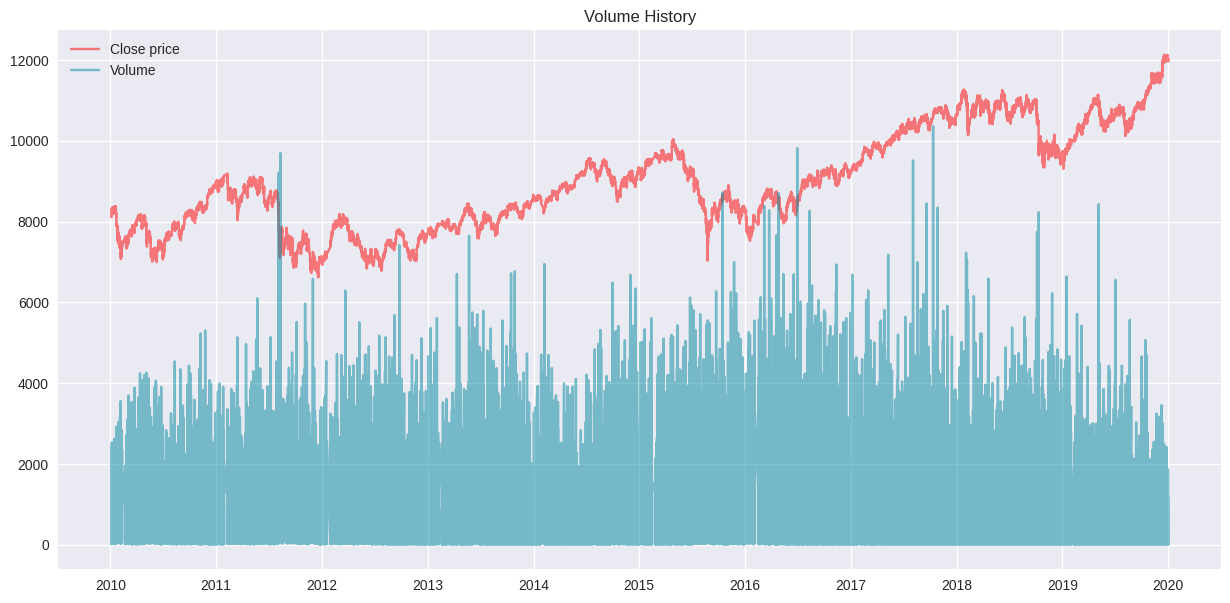

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(df['close'], color = 'red', alpha = 0.5, label = 'Close price')
plt.plot(df['volume'], color = '#01889f', alpha = 0.5, label = 'Volume')
plt.legend(loc='upper left')
plt.title('Volume History');

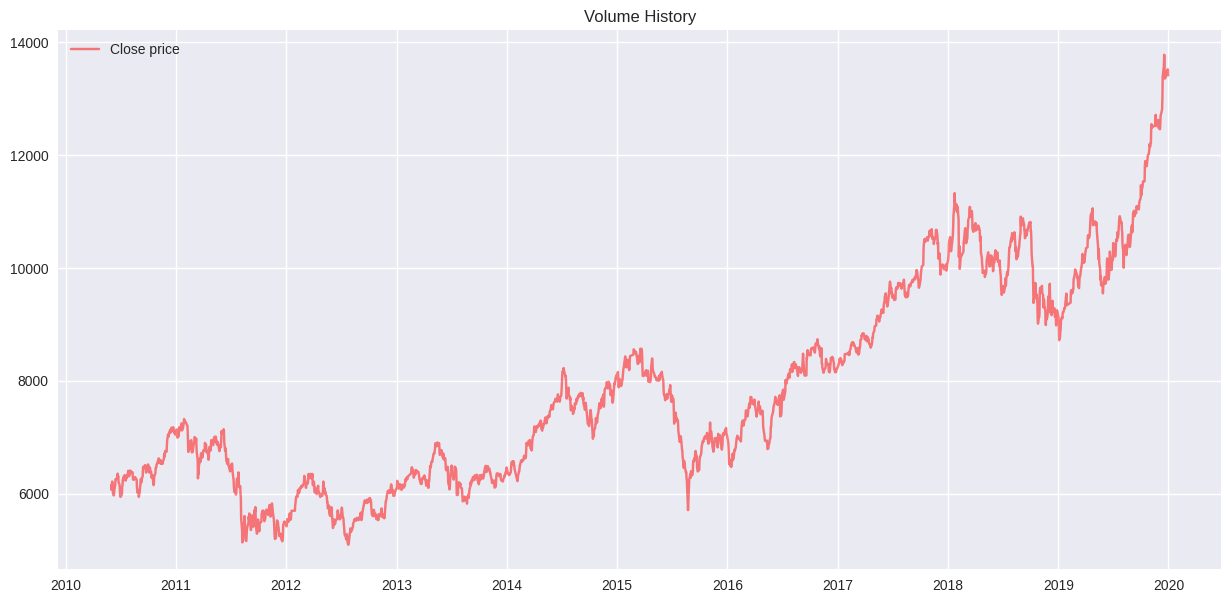

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(cf['close'], color = 'red', alpha = 0.5, label = 'Close price')
#plt.plot(cf['volume'], color = '#01889f', alpha = 0.5, label = 'Volume')
plt.legend(loc='upper left')
plt.title('Volume History');

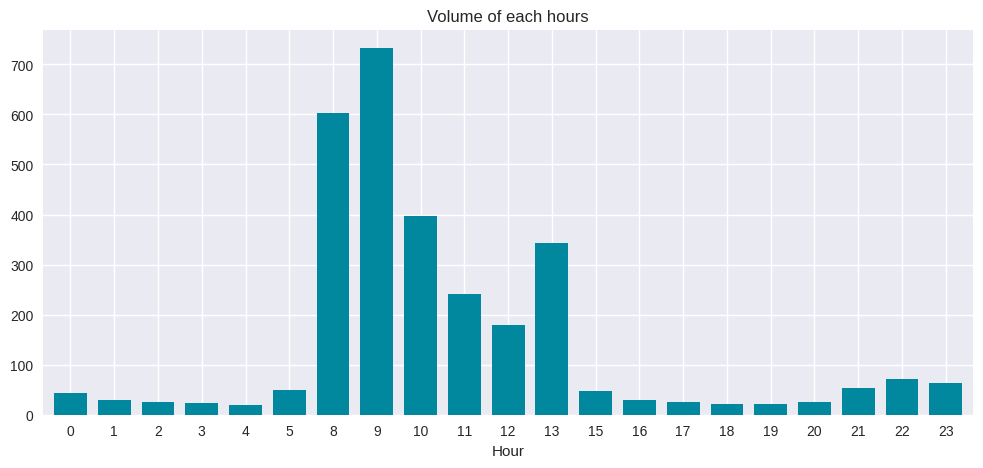

In [ ]:
data = df[(df.index >= '2017-05-15 00:00:00')].copy()
plt.figure(figsize = (12,5))
data.groupby(['Hour'])['volume'].mean().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation = 0)
plt.title('Volume of each hours');

In [ ]:
rule = '3T' #3T代表3個時間單位。這裡是3分鐘
Morning = df[(df['Hour'] >= 8) & (df['Hour'] <= 13)] #日盤
Morning.index = Morning.index + dt.timedelta(minutes=15)
Morning.iloc[0:8]

,open,high,low,close,volume,Hour
2010-01-04 09:01:00,8203.0,8208.0,8184.0,8187.0,1108,8
2010-01-04 09:02:00,8187.0,8195.0,8186.0,8193.0,429,8
2010-01-04 09:03:00,8194.0,8201.0,8193.0,8200.0,419,8
2010-01-04 09:04:00,8200.0,8203.0,8198.0,8200.0,295,8
2010-01-04 09:05:00,8200.0,8201.0,8195.0,8197.0,187,8
2010-01-04 09:06:00,8198.0,8200.0,8195.0,8197.0,219,8
2010-01-04 09:07:00,8197.0,8200.0,8195.0,8196.0,207,8
2010-01-04 09:08:00,8196.0,8199.0,8195.0,8197.0,167,8


In [ ]:
# 確認 9:03 及 9:06 的 open 是 9:01 及 9:04 的 open
Morning.resample(rule=rule, closed='right', label='right').first()[['open']].iloc[0:3] #Label是顯示時K棒以最左邊或最右邊為單位

,open
2010-01-04 09:03:00,8203.0
2010-01-04 09:06:00,8200.0
2010-01-04 09:09:00,8197.0


In [ ]:
# label='left' => 時間轉為左側時間
Morning.resample(rule=rule, closed='right', label='left').first()[['open']].iloc[0:3]

,open
2010-01-04 09:00:00,8203.0
2010-01-04 09:03:00,8200.0
2010-01-04 09:06:00,8197.0


In [ ]:
rule = '60T'

Morning = df[(df['Hour'] >= 8) & (df['Hour'] <= 13)]#日盤
Morning.index = Morning.index + dt.timedelta(minutes=15)

d1 = Morning.resample(rule=rule, closed='right', label='left').first()[['open']] #只要第一開盤價
d2 = Morning.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Morning.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Morning.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Morning.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Morning = pd.concat([d1,d2,d3,d4,d5], axis=1) #5合1
df_Morning = df_Morning.dropna()
df_Morning.index = df_Morning.index - dt.timedelta(minutes=15)
df_Morning.head()

,open,high,low,close,volume
2010-01-04 08:45:00,8203.0,8211.0,8181.0,8187.0,17247
2010-01-04 09:45:00,8187.0,8188.0,8101.0,8165.0,31531
2010-01-04 10:45:00,8167.0,8180.0,8158.0,8172.0,8859
2010-01-04 11:45:00,8172.0,8207.0,8167.0,8197.0,12329
2010-01-04 12:45:00,8198.0,8200.0,8165.0,8166.0,13915


In [ ]:
rule = '60T'

Night = df[(df['Hour'] < 8) | (df['Hour'] > 13)] #夜盤

d1 = Night.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Night.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Night.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Night.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Night.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Night = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Night = df_Night.dropna()
df_Night.head()

,open,high,low,close,volume
2017-05-15 15:00:00,10023.0,10034.0,10020.0,10033.0,925
2017-05-15 16:00:00,10032.0,10032.0,10028.0,10030.0,300
2017-05-15 17:00:00,10030.0,10030.0,10026.0,10027.0,137
2017-05-15 18:00:00,10026.0,10028.0,10025.0,10027.0,148
2017-05-15 19:00:00,10028.0,10030.0,10028.0,10030.0,40


In [ ]:
df_day = pd.concat([df_Morning, df_Night], axis=0) #日盤+夜盤
df_day = df_day.sort_index(ascending=True) #時間排序
df_day.head()

,open,high,low,close,volume
2010-01-04 08:45:00,8203.0,8211.0,8181.0,8187.0,17247
2010-01-04 09:45:00,8187.0,8188.0,8101.0,8165.0,31531
2010-01-04 10:45:00,8167.0,8180.0,8158.0,8172.0,8859
2010-01-04 11:45:00,8172.0,8207.0,8167.0,8197.0,12329
2010-01-04 12:45:00,8198.0,8200.0,8165.0,8166.0,13915


In [ ]:
# ### 特例：日K處理 ###
day = df.loc['2017-5-15':].copy()
df_day.index = df_day.index - dt.timedelta(hours=8) #將時間減8小時後resample

d1 = df_day.resample(rule='1D', closed='right', label='left').first()[['open']]
d2 = df_day.resample(rule='1D', closed='right', label='left').max()[['high']]
d3 = df_day.resample(rule='1D', closed='right', label='left').min()[['low']]
d4 = df_day.resample(rule='1D', closed='right', label='left').last()[['close']]
d5 = df_day.resample(rule='1D', closed='right', label='left').sum()[['volume']]

df_day = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_day = df_day.dropna()
df_day.index = df_day.index + dt.timedelta(days=1) ##回測時結算日也要加一天
df_day.tail()

,open,high,low,close,volume
2019-12-26,11989.0,12027.0,11976.0,12017.0,45484
2019-12-27,12029.0,12042.0,11986.0,12025.0,63660
2019-12-28,12038.0,12112.0,12037.0,12082.0,92609
2019-12-31,12091.0,12125.0,12020.0,12023.0,89086
2020-01-01,12029.0,12049.0,11965.0,11997.0,92573


### 選擇回測資料

In [ ]:
# df_Morning['Month'] = df_Morning.index.map(lambda x: x.month)
# df_Morning['Weekday'] = df_Morning.index.map(lambda x: x.weekday)+1
df_Morning['Date'] = df_Morning.index.map(lambda x: x.date)

In [ ]:
#將資料切成兩份
trainData = df_Morning[(df_Morning.index >= '2011-01-01 00:00:00') & (df_Morning.index <= '2019-12-31 00:00:00')].copy()
testData = df_Morning[(df_Morning.index >= '2020-1-1 00:00:00') & (df_Morning.index <= '2022-5-22 00:00:00')].copy()

In [ ]:
trainData.head(3)

,open,high,low,close,volume,Date
2011-01-03 08:45:00,9000.0,9029.0,8995.0,9005.0,20508,2011-01-03
2011-01-03 09:45:00,9005.0,9014.0,8997.0,9011.0,9022,2011-01-03
2011-01-03 10:45:00,9010.0,9030.0,9010.0,9023.0,12537,2011-01-03


In [ ]:
testData.tail(3)

,open,high,low,close,volume,Date


### 取得結算日資料
* https://www.taifex.com.tw/cht/5/futIndxFSP

In [ ]:
settlementDate_ = pd.read_csv('settlementDate.csv')#, encoding = 'ANSI')
settlementDate_.columns = ['settlementDate', 'futures', 'settlementPrice']
settlementDate_

,settlementDate,futures,settlementPrice
0,2022/08/03,202208W1,14707
1,2022/07/27,202207W4,14887
2,2022/07/20,202207,14713
3,2022/07/13,202207W2,14384
4,2022/07/06,202207W1,14015
5,2022/06/29,202206W5,15261
6,2022/06/22,202206W4,15388
7,2022/06/15,202206,16061
8,2022/06/08,202206W2,16659
9,2022/06/01,202206W1,16717


In [ ]:
bool_ = [False if 'W' in i else True for i in settlementDate_['futures']] #只抓沒有"W"的資料 (W代表周結算)

In [ ]:
len(list(settlementDate_[bool_]['futures']))

156

In [ ]:
12*12 + 5 + 7

156

In [ ]:
settlementDate = [i.replace('/','-') for i in list(settlementDate_[bool_]['settlementDate'])]

In [ ]:
settlementDate = [pd.to_datetime(i).date() for i in settlementDate]

In [ ]:
settlementDate[-5:] #前五筆

[datetime.date(2009, 12, 16),
 datetime.date(2009, 11, 18),
 datetime.date(2009, 10, 21),
 datetime.date(2009, 9, 16),
 datetime.date(2009, 8, 19)]

## 回測假設
* 換月轉倉：結算日當天直接平倉
* 進場限制：結算日當天不進場
* 報酬計算：200 * 點數
* 手續費+滑價：單邊 600元

###交易流程
Step1.進場 (做多) **開始紀錄未實現損益**

Step2.
> 加減碼 (條件機率、合理性)

> 結算日 (轉倉/不轉倉、近遠月價差) ***平倉近月合約、進場遠月合約***

 /直接結算，等下次進場訊號/

Step3.出場 (訊號出場/固定停損停利) **計算交易成本**

###程式碼架構###
####無加碼
> 參數設置->指標計算->建立存放資料單位->開始交易流程(定義進出場邏輯->確定進出場和相關設定->未實現損益計算->確定出場並重置相關設定)

####加碼
> 參數設置->指標計算->建立存放資料單位->開始交易流程(定義進出場邏輯->確定進出場和相關設定->**確認加碼條件**->未實現損益計算->確定出場並重置相關設定)


### 注意事項

*   看到訊號，下根K棒 (開盤/收盤) 才能進場
*   **不要看到未來資料**
*   交易成本計算
*   部位數量控管，最佳化部位數量





In [ ]:
#參數設定
fund = 1000000
feePaid = 600
length = 15
NumStd = 1.5
K = 0.04

#指標計算
# trainData['H'] = trainData['high'].shift(1).rolling(window=length, center=False).max()
# trainData['L'] = trainData['low'].shift(1).rolling(window=length, center=False).min()
cf['MA'] = cf['close'].rolling(window=length, center=False).mean()
#trainData['STD'] = trainData['close'].rolling(window=length, center=False).std() #STD標準差
#trainData['upLine'] = trainData['MA'] + NumStd*trainData['STD'] #布林通道上軌
#trainData['downLine'] = trainData['MA'] - NumStd*trainData['STD'] #布林通道下軌

trainData.tail(3)
cf.tail(3)


#cf['STD'] = trainData['close'].rolling(window=length, center=False).std() #STD標準差
#trainData['upLine'] = trainData['MA'] + NumStd*trainData['STD'] #布林通道上軌
#trainData['downLine'] = trainData['MA'] - NumStd*trainData['STD'] #布林通道下軌

,open,high,low,close,volume,MA
Date,,,,,,
2019-12-27,13653.07,13489.85,13665.39,13489.85,NaN,13316.990667
2019-12-30,13536.93,13653.07,13677.23,13520.93,NaN,13367.880667
2019-12-31,13413.15,13536.93,13536.93,13413.15,NaN,13409.348667


In [ ]:
df_arr = np.array(trainData)
df_arr

array([[9000.0, 9029.0, 8995.0, 9005.0, 20508, datetime.date(2011, 1, 3)],
       [9005.0, 9014.0, 8997.0, 9011.0, 9022, datetime.date(2011, 1, 3)],
       [9010.0, 9030.0, 9010.0, 9023.0, 12537, datetime.date(2011, 1, 3)],
       ...,
       [12096.0, 12108.0, 12089.0, 12104.0, 6348,
        datetime.date(2019, 12, 30)],
       [12103.0, 12110.0, 12099.0, 12107.0, 3898,
        datetime.date(2019, 12, 30)],
       [12108.0, 12109.0, 12065.0, 12069.0, 17832,
        datetime.date(2019, 12, 30)]], dtype=object)

In [ ]:
time_arr = np.array(trainData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr] #確定是不是結算日

#翻譯蒟蒻
# date_arr = []
# for i in time_arr:
#     date_arr.append(pd.to_datetime(i).date())

### 做多

<Axes: xlabel='Date'>

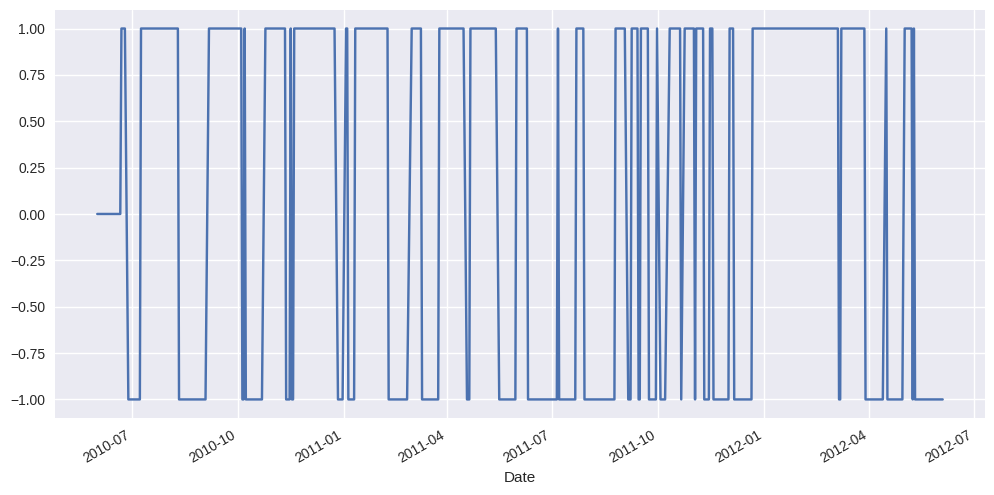

In [ ]:
signal=np.zeros([len(cf)])
conditionaal1=(cf['close']>cf['MA'])
conditionaal2=(cf['close']<cf['MA'])
for i in range(len(cf)):
  if conditionaal1[i]:
    signal[i]=1
  elif conditionaal2[i]:
    signal[i]=-1
signal_df=pd.Series(signal,index=cf.index)
plt.figure(figsize=(12,6))
signal_df[:500].plot()

<Axes: xlabel='Date'>

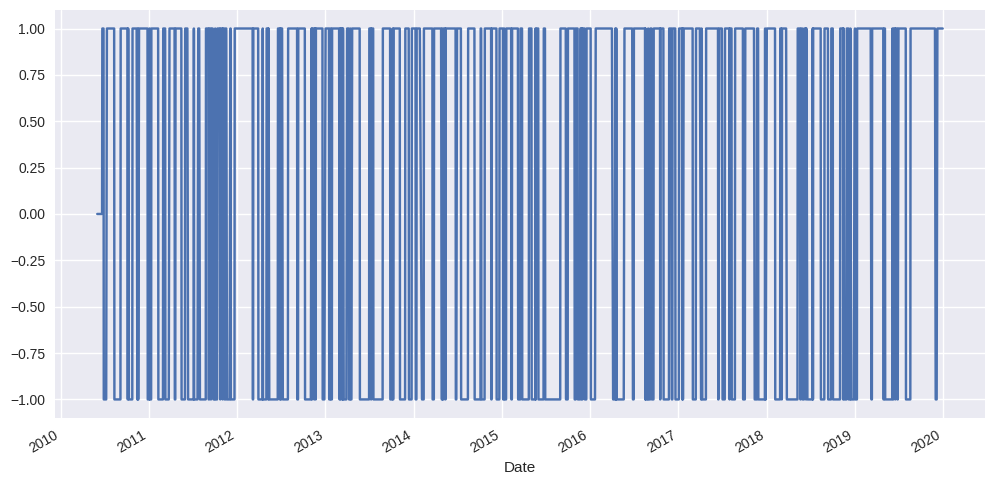

In [ ]:
position_df=signal_df.shift(1)
position_df.plot(figsize=(12,6))

In [ ]:
position_df.tail(6)

Date
2019-12-24    1.0
2019-12-25    1.0
2019-12-26    1.0
2019-12-27    1.0
2019-12-30    1.0
2019-12-31    1.0
dtype: float64

In [ ]:
df['position']=position_df
df=df[['close','volume','position']].dropna()

In [ ]:
df['ret']=df['close'].pct_change()
df['cum_ret']=df['ret'].cumsum()
df

,close,volume,position,ret,cum_ret
2017-05-19,9942.0,11,1.0,NaN,NaN
2017-05-23,9981.0,1,1.0,0.003923,0.003923
2017-05-24,10006.0,9,1.0,0.002505,0.006428
2017-05-25,10028.0,1,1.0,0.002199,0.008626
2017-05-26,10126.0,3,1.0,0.009773,0.018399
2017-06-01,10014.0,7,1.0,-0.011061,0.007338
2017-06-02,10078.0,4,1.0,0.006391,0.013729
2017-06-06,10205.0,30,1.0,0.012602,0.026331
2017-06-07,10186.0,19,1.0,-0.001862,0.024469
2017-06-08,10191.0,16,1.0,0.000491,0.024960


In [ ]:
strategy_ret=np.zeros(len(df))
for i in range(len(df)):
  if df['position'][i]==1:
    strategy_ret[i]=df['ret'][i]*df['position'][i]
  elif df['position'][i]==-1:
    strategy_ret[i]=df['ret'][i]*df['position'][i]

In [ ]:
strategy_ret=df['ret']*df['position']
df['strategy_ret']=strategy_ret
df['cum_strategy_ret']=df['strategy_ret'].cumsum()

In [ ]:
#fig,ax=plt.subplots(figsize=(16,6))
#df['cum_strategy_ret'],['cum_ret'].plot(label='Total Return', ax=ax)
#plt.legend()
#plt.title('Stock & Total Return', fontsize=16)

Text(0.5, 1.0, 'Total Return')

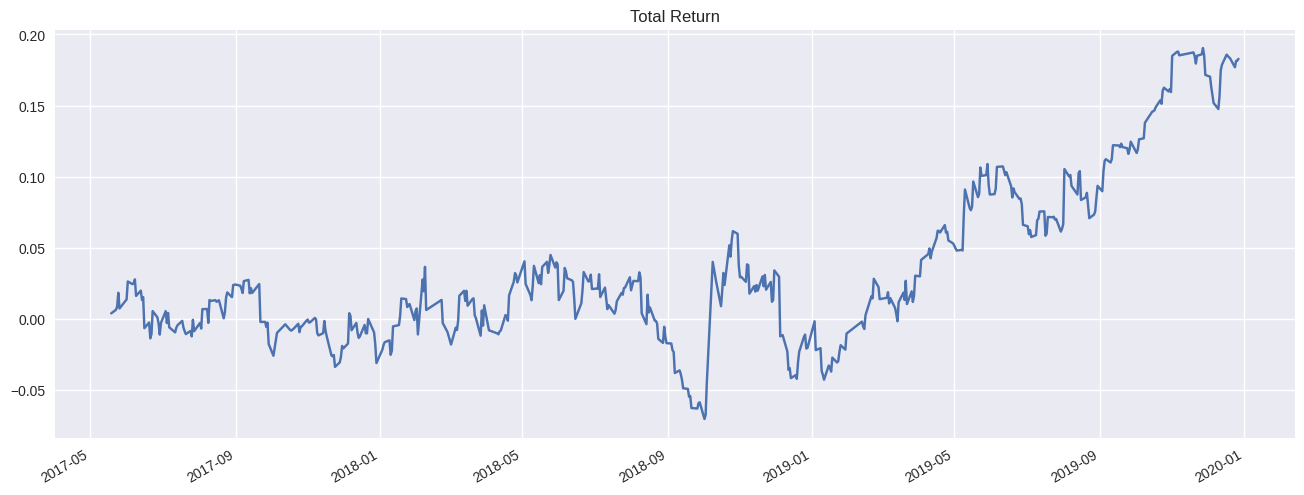

In [ ]:
df['ret']=df['close'].pct_change().shift(-1)
df['position']=position_df
(df['ret']*df['position']).cumsum().plot(figsize=(16,6))
plt.title('Total Return')

Text(0.5, 1.0, 'Cumulative Return')

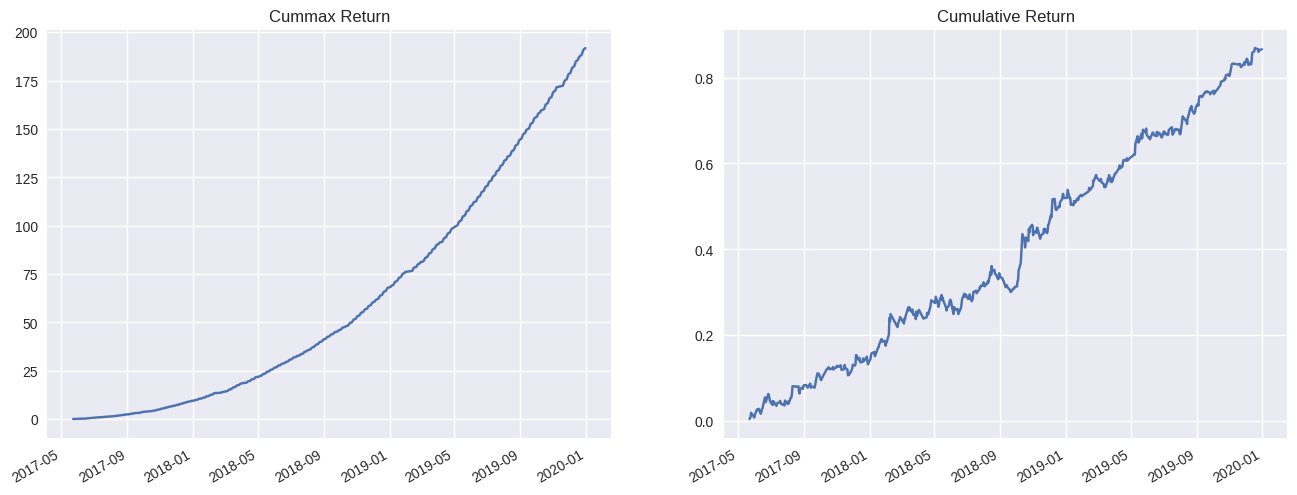

In [ ]:
fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df['cum_strategy_ret'].cumsum().plot()
plt.title('Cummax Return')
plt.subplot(1,2,2)
df['cum_strategy_ret'].plot()
plt.title('Cumulative Return')

<Axes: >

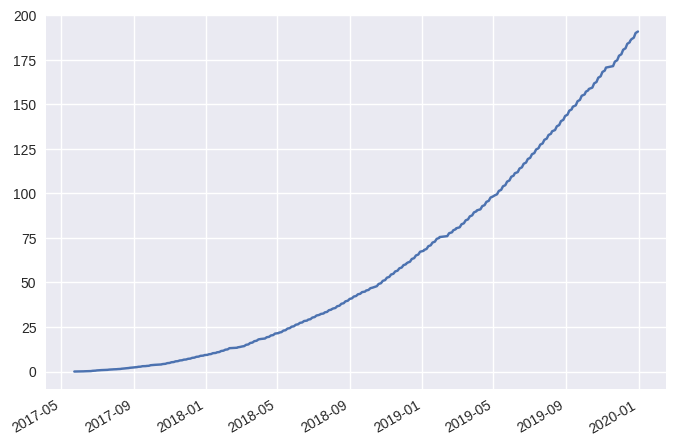

In [ ]:
MDD_series=df['cum_strategy_ret'].cumsum()-df['cum_strategy_ret']
MDD_series.plot()

In [ ]:
high_index=df['cum_strategy_ret'][df['cum_strategy_ret'].cumsum()==df['cum_strategy_ret']].index

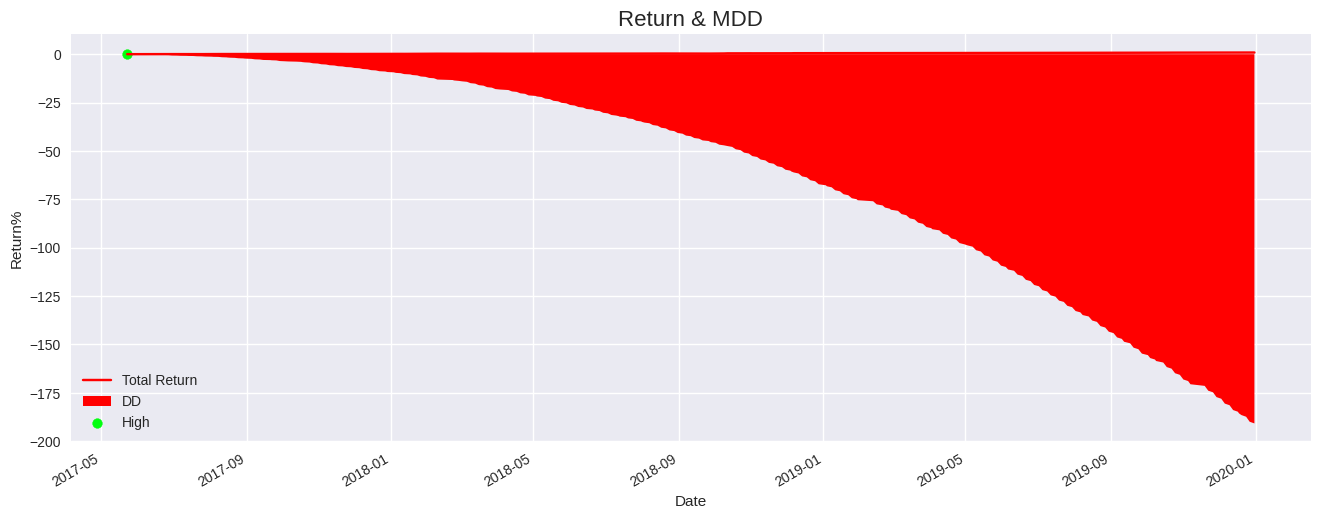

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
df['cum_strategy_ret'].plot(label='Total Return',ax=ax,c='r')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='r',label='DD')
plt.scatter(high_index,df['cum_strategy_ret'].loc[high_index],c='#02ff0f',label='High')
plt.legend()
plt.ylabel('Return%')
plt.xlabel('Date')
plt.title('Return & MDD', fontsize=16);

In [ ]:
MDD=round(MDD_series.max(),2)*100
Cumulative_Return=round(df['cum_strategy_ret'].iloc[-1],2)*100
Return_on_MDD=round(df['cum_strategy_ret'].iloc[-1]/MDD_series.max(),2)
daily_return=df['cum_strategy_ret'].diff(1)

print('Cumulative_Return:{}%',format(Cumulative_Return))
print('MDD:{}%'.format(MDD))
print('Return_on_MDD:{}'.format(Return_on_MDD))
print('Shape Ratio:{}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))

Cumulative_Return:{}% 87.0
MDD:19092.0%
Return_on_MDD:0.0
Shape Ratio:3.0
